# OVERVIEW

## Description
url = Link to listing
city = Craigslist region in which this listing was posted
city_url = Link to region page
price = Price of vehicle
year = Year of vehicle
manufacturer = Manufacturer of vehicle
make = Make of vehicle
condition = Condition of vehicle
cylinders = Number of cylinders of vehicle
fuelFuel = taken by vehicle
odometer = Miles vehicle has been driven
title_status = Title status of vehicle (e.g. clean - this vehicle has all legal documents. missing - these documents are missing)
transmission = Transmission of vehicle
VIN = Vehicle Identification Number
drive = Drive of vehicle
size = Size of vehicle
type = Vehicle type
paint_color = Color of vehicle
image_url = Link to image of vehicle
desc = Listing description provided by owner
lat = Latitude of vehicle (not precise but very close)
long = Longitude of vehicle (not precise but very close)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#import KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN

In [2]:
dfautomobile = pd.read_csv('dfautomobile.csv')
dfautomobile.head()

,Unnamed: 0,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,122.0,3
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,122.0,3
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,122.0,1
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [3]:
dfautomobile = dfautomobile.drop(['Unnamed: 0', 'ID'],1)
dfautomobile.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,122.0,3
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,122.0,3
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,122.0,1
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [4]:
dfautomobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-null float64
peak-rpm             205 non-null float64
city-mpg             205 no

In [5]:
df = dfautomobile[['engine-size','price']]
df

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0
...,...,...
200,141,16845.0
201,141,19045.0
202,173,21485.0
203,145,22470.0


## K-MEANS

In [6]:
# Step 3. Konversi Dataset ke Data Array 
dfKmeans = np.asarray(df)

Text(0.5,1,'Price Mobile based on Engine Size')

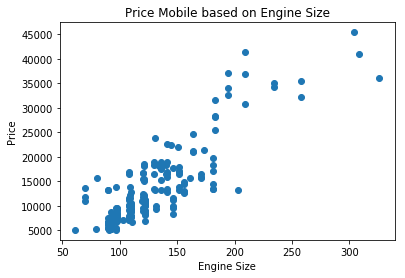

In [7]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(dfKmeans[:,0],dfKmeans[:,1], label = 'True Position')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Price Mobile based on Engine Size")

### Scree Plot

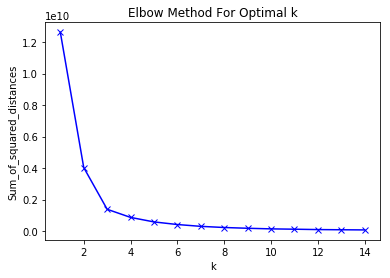

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfKmeans)
    Sum_of_squared_distances.append(km.inertia_) #y axis #inertia = sum  dari squared distrance

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

elbow selected is **3**

### Silhouette

In [9]:
range_n_clusters = [2, 3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(dfKmeans)
    labels = kmeans.predict(dfKmeans)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(dfKmeans, labels)
    print(silhouette_avg)

0.7213831310277494
0.6556662071905474
0.6003732475905085
0.6093531464113795


In [10]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=2)
kmeans.fit(dfKmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[  203.84       30585.12      ]
 [  116.22222222 10793.51954118]]


In [12]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


In [13]:
df['Cluster KMeans'] = pd.DataFrame(kmeans.labels_)

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df

,engine-size,price,Cluster KMeans
0,130,13495.0,1
1,130,16500.0,1
2,152,16500.0,1
3,109,13950.0,1
4,136,17450.0,1
...,...,...,...
200,141,16845.0,1
201,141,19045.0,1
202,173,21485.0,0
203,145,22470.0,0


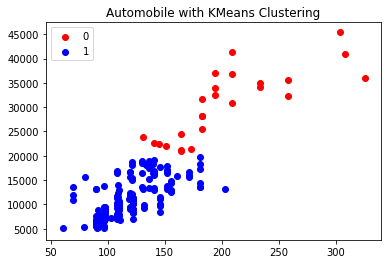

In [15]:
# Step 7 Visualisasi Hasil 
x = dfKmeans[:,0]
x1 = dfKmeans[:,1]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.title("Automobile with KMeans Clustering")
plt.show()

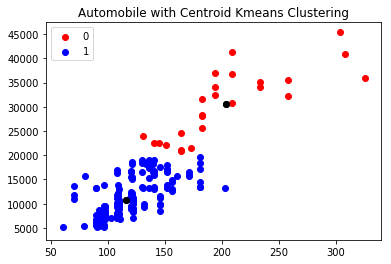

In [16]:
# Step 8 Menampilkan hasil centroid 
x = dfKmeans[:,0]
x1 = dfKmeans[:,1]
group= kmeans.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
ax.legend()
plt.title("Automobile with Centroid Kmeans Clustering")
plt.show()

In [17]:
# Memasukkan hasil label ke dalam suatu 
data_clustered = pd.DataFrame(dfKmeans)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
data_clustered

array([[1.41000000e+02, 2.26250000e+04, 0.00000000e+00],
       [3.04000000e+02, 4.54000000e+04, 0.00000000e+00],
       [3.08000000e+02, 4.09600000e+04, 0.00000000e+00],
       [2.34000000e+02, 3.50560000e+04, 0.00000000e+00],
       [2.34000000e+02, 3.41840000e+04, 0.00000000e+00],
       [1.94000000e+02, 3.70280000e+04, 0.00000000e+00],
       [1.94000000e+02, 3.40280000e+04, 0.00000000e+00],
       [1.94000000e+02, 3.25280000e+04, 0.00000000e+00],
       [1.51000000e+02, 2.20180000e+04, 0.00000000e+00],
       [2.58000000e+02, 3.22500000e+04, 0.00000000e+00],
       [2.58000000e+02, 3.55500000e+04, 0.00000000e+00],
       [3.26000000e+02, 3.60000000e+04, 0.00000000e+00],
       [2.09000000e+02, 4.13150000e+04, 0.00000000e+00],
       [2.09000000e+02, 3.07600000e+04, 0.00000000e+00],
       [2.09000000e+02, 3.68800000e+04, 0.00000000e+00],
       [1.64000000e+02, 2.11050000e+04, 0.00000000e+00],
       [1.64000000e+02, 2.09700000e+04, 0.00000000e+00],
       [1.83000000e+02, 3.16000

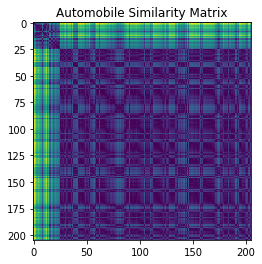

In [18]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.title("Automobile Similarity Matrix")
plt.show()

### Kesimpulan
Berdasarkan percobaan clustering menggunakan algoritma KMeans membentuk **2 cluster**, sebagai berikut:
1. Cluster 1 merupakan cluster harga mobil dibawah 20000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang lebih rendah
2. Cluster 2 merupakan cluster harga mobil diatas 20000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang lebih tinggi<br>
**Engine Size** merupakan komponen pada mobil yang mempengaruhi kecepatan, sehingga semakin besar engine size terbukti semakin mahal<br>
<br>Namun pada hasil cluster ini cukup jauh rentang harga mobil yang terendah yaitu dari 5000-20000

## HIERARCHICAL CLUSTERING

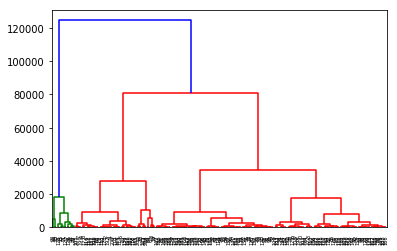

In [19]:
# Step 5. Membentuk dendogram dengan metode ward 
dendrogram = sch.dendrogram(sch.linkage(dfKmeans, method='ward'))

In [20]:
# Melakukan fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(dfKmeans)
labels = model.labels_
labels

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
df['Cluster Hierarchical'] = pd.DataFrame(labels)
df.head()

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,engine-size,price,Cluster KMeans,Cluster Hierarchical
0,130,13495.0,1,0
1,130,16500.0,1,2
2,152,16500.0,1,2
3,109,13950.0,1,0
4,136,17450.0,1,2


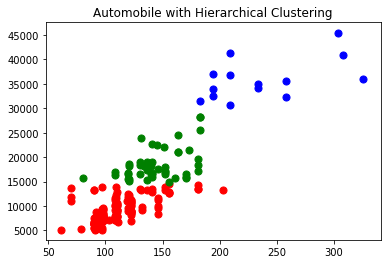

In [22]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(dfKmeans[labels==0, 0], dfKmeans[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(dfKmeans[labels==1, 0], dfKmeans[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(dfKmeans[labels==2, 0], dfKmeans[labels==2, 1], s=50, marker='o', color='green')
plt.title("Automobile with Hierarchical Clustering")
plt.show()

## Kesimpulan
Berdasarkan percobaan clustering menggunakan algoritma KMeans membentuk **3 cluster**, sebagai berikut:
1. Cluster 1 merupakan cluster harga mobil dibawah 14000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang rendah
2. Cluster 2 merupakan cluster harga mobil diantara 14000-28000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang relatif sedang <br>
3. Cluster 2 merupakan cluster harga mobil diatas 28000-45000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang tinggi <br>
<br>Pada hasil algortima ini menunjukkan jarak antara cluster **tidak terlalu jauh**.

## DBSCAN

In [23]:
# Step 5. Melakukan aktivasi algoritma DBSCAN
dbscan = DBSCAN(eps=1000,min_samples=15)
dbscan.fit(dfKmeans)

DBSCAN(algorithm='auto', eps=1000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=1, p=None)

In [24]:
# Step 6. Menampilkan label dibangkitkan oleh algoritma dbscan 
print(dbscan.labels_)

[ 0  1  1  0  1  1  1  1 -1  0  1  1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  1 -1 -1 -1 -1 -1
 -1 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1 -1  1  0  0  0  0  1  1  1  1  1  1  1  0  0
  0  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1 -1 -1 -1]


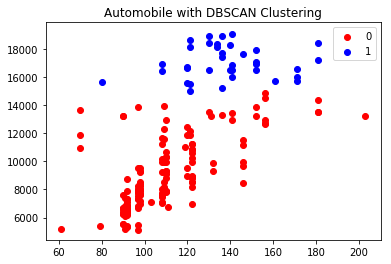

In [25]:
# Step 7 Visualisasi Hasil 
# Step 8 Menampilkan hasil centroid 
x = dfKmeans[:,0]
x1 = dfKmeans[:,1]
group= dbscan.labels_
color = ['red','blue','green']
fig, ax = plt.subplots()
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb, c=color[g], label=g)
ax.legend()
plt.title("Automobile with DBSCAN Clustering")
plt.show()

In [26]:
df['Cluster DBSCAN'] = pd.DataFrame(dbscan.labels_)
df.head()

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,engine-size,price,Cluster KMeans,Cluster Hierarchical,Cluster DBSCAN
0,130,13495.0,1,0,0
1,130,16500.0,1,2,1
2,152,16500.0,1,2,1
3,109,13950.0,1,0,0
4,136,17450.0,1,2,1


## Kesimpulan
Berdasarkan percobaan clustering menggunakan algoritma KMeans membentuk **2 cluster**, sebagai berikut:

1. Cluster 1 merupakan cluster harga mobil dibawah 15000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang rendah
2. Cluster 2 merupakan cluster harga mobil diatas 15000, dimana cluster tersebut memiliki karakteristik yang sama yaitu dengan nilai engine-size yang tinggi<br>
Pada hasil algortima ini terlihat ada beberapa sebaran data yang sebenarnya bertumpukan dalam beda cluster

# CONCLUSION
### Pertanyaan
1. Berapa cluster yang Anda buat? Anda menggunakan atribut/feature apa saja? <br>
2. Manakah algoritma clustering yang Anda ambil? Mengapa? <br>
3. Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?

### Jawaban
1. Saya menggunakan 3 algoritma cluster, yaitu KMeans, Hierarchical, dan DBSCAN <br>
   a. Cluster yang dibentuk berdasarkan KMeans = **2**<br> 
   b. Cluster yang dibentuk berdasarkan Hierarchical = **3**<br> 
   c. Cluster yang dibentuk berdasarkan DBSCAN = **2**<br> 
   Feature yang digunakan adalah Engine-Size dan Price<br>
2. Algoritma clustering yang saya ambil adalah Hierarchical, dikarenakan jarak antara cluster tidak lebih dekat <br>
3. Iya, dengan penjelasan sebagai berikut: <br>
   a. KMeans : memiliki ciri-ciri penentuan berdasarkan k centroid, dimana pada kasus ini k sebesar 2 yang diketahui berdasarkan nilai Silhoutte yang paling tinggi.
   b. Hierarchical : memiliki ciri-ciri perbedaan bentuk dendrogram berdasarkan pemilihan linkage yaitu **ward** dan method yaitu **ward**
   c. DBSCAN :memiliki ciri-ciri berdasarkan penentuan nilai epsilon sebesar **1000** dan minimum points **15**